<div style="border-radius: 10px; background-color: #A478B8">
    <h1 style="color: white; padding: 1rem">Introduction</h1>
</div>

This is notebook that attempts to perform **Exploratory Data Analysis** on the **[Pima Indians Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)** and eventually train a Machine Learning model on it and enhance the predictions by fine-tuning the model.

In [95]:
# for data wrangling
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_predict, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, PrecisionRecallDisplay, RocCurveDisplay, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [96]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


<div style="border-radius: 10px; background-color: #A478B8">
    <h1 style="color: white; padding: 1rem">Know the Data</h1>
</div>

Let us first look at what information the dataset contains. One thing to note is, all patients here are females **at least 21 years old** of Pima Indian heritage.

The dataset has the following **features** (columns):

- **<span style="color: darkblue">Pregnancies</span>**: Number of times pregnant
- **<span style="color: darkblue">Glucose</span>**: Plasma glucose concentration, 2 hours in an oral glucose tolerance test
- **<span style="color: darkblue">BloodPressure</span>**: Diastolic blood pressure ($mm \cdot Hg$)
- **<span style="color: darkblue">SkinThickness</span>**: Triceps skin fold thickness ($mm$)
- **<span style="color: darkblue">Insulin</span>**: 2-Hour serum insulin ($mu \cdot \dfrac{U} {ml}$)
- **<span style="color: darkblue">BMI</span>**: Body mass index (weight in $kg$ / height in $m^2$)
- **<span style="color: darkblue">DiabetesPedigreeFunction</span>**: Diabetes pedigree function (indicates the function which scores likelihood of diabetes based on family history)
- **<span style="color: darkblue">Age</span>**: Age (in years)
- **<span style="color: darkblue">Outcome</span>**: Whether patient is diagnosed with Diabetes (0 for No, 1 for Yes)

**<span style="color: purple"> Outcome is our target variable </span>**.

<div style="border-radius: 10px; background-color: #A478B8">
    <h1 style="color: white; padding: 1rem">Load the dataset</h1>
</div>

Using **Pandas** we load the dataset.

In [97]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


An important thing to note here is that:

> This Pima Indians Diabetes dataset contains only **768 rows** and **9 features**. If we want to split the dataset into training and testing set, we need to ensure that the test set is *representative* of the whole dataset. This helps in avoiding the **Sampling Bias** when the training and testing sets are chosen randomly.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We clearly see that apart from the feature `Outcome`, every other feature is numerical and continuous in nature.

In [99]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<span style="color: purple">Note: The minimum value of the features `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` and `BMI` is 0. This is logically incorrect as these values cannot be 0. Thus, this can be safely called "missing data" in our case. We need to either drop the 0-valued rows or we need to replace them with the *mean* or *median* value of that feature.</span>**

Let's check for null values (if any):

In [100]:
# helper function
def count_na(df, col):
    print(f"Null values in {col}: ", df[col].isna().sum())

for feat in df.columns:
    count_na(df, feat)

Null values in Pregnancies:  0
Null values in Glucose:  0
Null values in BloodPressure:  0
Null values in SkinThickness:  0
Null values in Insulin:  0
Null values in BMI:  0
Null values in DiabetesPedigreeFunction:  0
Null values in Age:  0
Null values in Outcome:  0


Good! There are no null values in our dataset. Let us move on to *visualizing* the dataset to gather more insights about the data.

<div style="border-radius: 10px; background-color: #A478B8">
    <h1 style="color: white; padding: 1rem">Data visualization</h1>
</div>

In this section, we will start visualizing the features of the dataset one by one. Firstly, **Univariate** feature visualization will be done, then we will move onto **Multivariate** feature visualization.

> To learn more about what **graphs** are useful for what **data-types**, check out this notebook here: [Statistical Data Types and Graphs (using Seaborn)](https://www.kaggle.com/code/maharshipandya/statistical-data-types-and-graphs-using-seaborn)

In [101]:
# Setting some styles
sns.set_style("darkgrid")
sns.set_palette("viridis")

<h1 style="color: darkblue">Univariate Analysis</h1>
<hr/>

### Analysis of Pregnancies

As observed, `Pregnancies` is a **Quantitative** feature. There are many plots to analyse these type of data. Histograms, Box plots and Violin plots, are useful to know how the data is distributed.

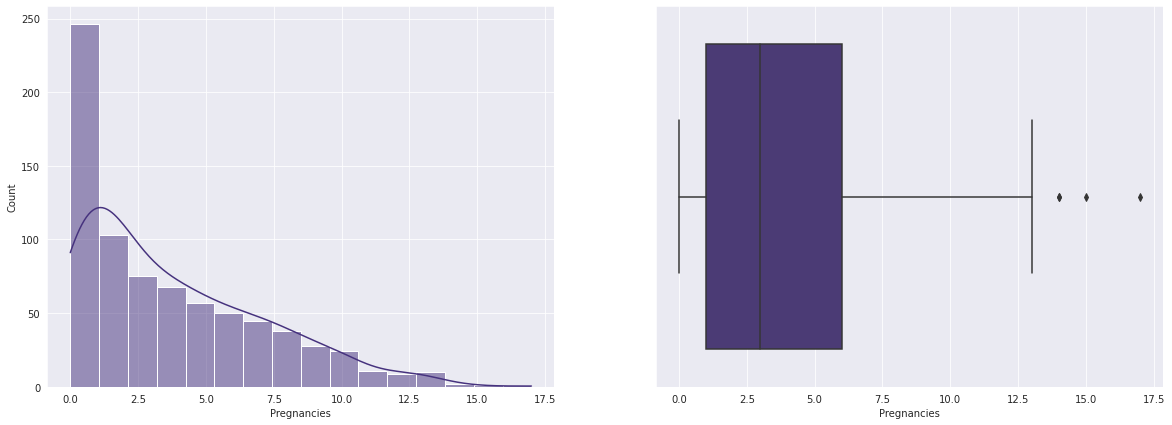

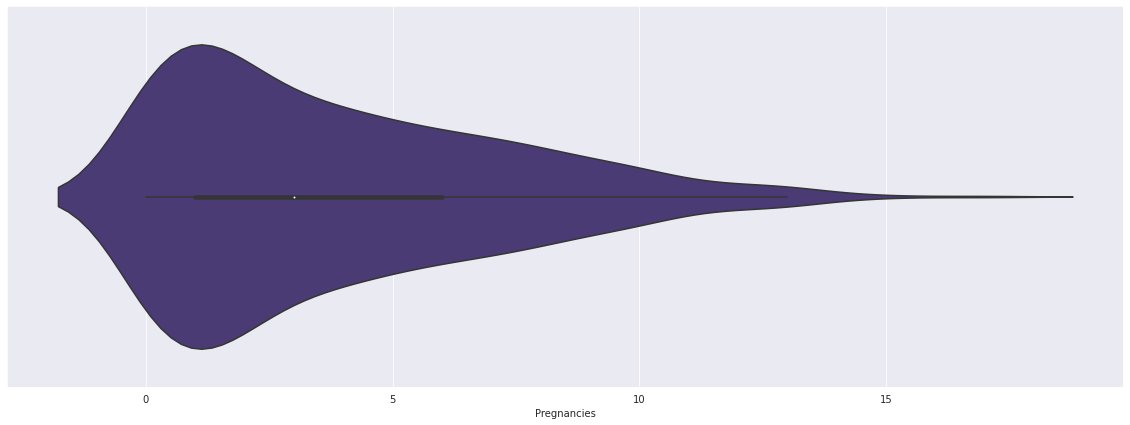

In [102]:
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))
fig2, ax2 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="Pregnancies", kde=True, ax=ax1[0])
sns.boxplot(data=df, x="Pregnancies", ax=ax1[1])

sns.violinplot(data=df, x="Pregnancies", ax=ax2)

plt.show()

In [103]:
print("Median of Pregnancies: ", df["Pregnancies"].median())
print("Maximum of Pregnancies: ", df["Pregnancies"].max())

Median of Pregnancies:  3.0
Maximum of Pregnancies:  17


In [104]:
df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

From the above analysis we observe that:

- Most patients had 0, 1 or 2 pregnancies.
- Median value of `Pregnancies` is **3**.
- Also, patients had upto **17** pregnancies!

There are 3 outliers on the boxplot. But, let's not remove them for now.

### Analysis of Outcome (Target Variable)

A Count plot and a Pie chart will be two useful plots to analyse the `Outcome` column as it is a categorical feature. Usefulness in the sense, both the plots will allow us to observe the distribution of each category in the feature.

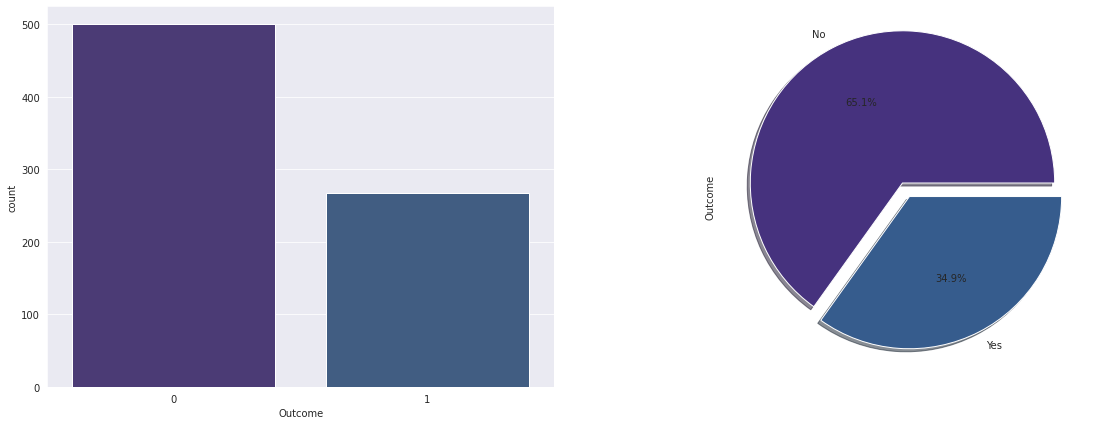

In [105]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=df, x="Outcome", ax=ax[0])
df["Outcome"].value_counts().plot.pie(explode=[0.1, 0], autopct="%1.1f%%", labels=["No", "Yes"], shadow=True, ax=ax[1])

plt.show()

We observe from the above plot that:

- **65.1% patients in the dataset do NOT have diabetes.**
- **34.9% patients in the dataset has diabetes.**

### Analysis of Glucose

`Glucose` is a **Quantitative** feature. Histograms, Box plots and Violin plots, are useful to know how the data is distributed.

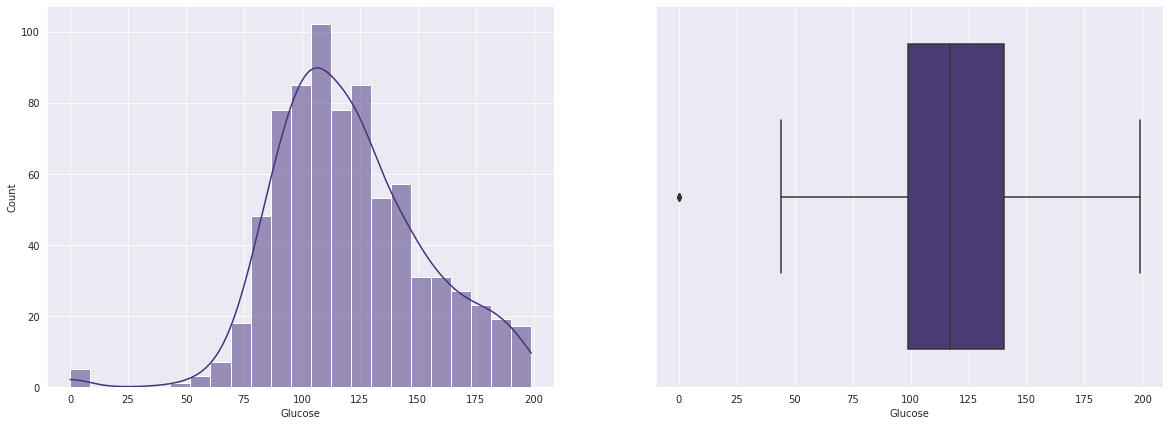

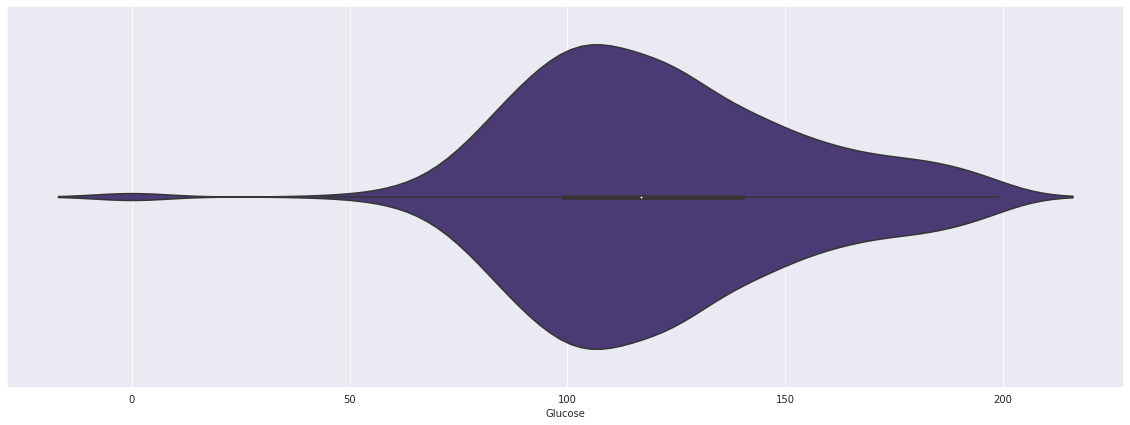

In [106]:
fig3, ax3 = plt.subplots(1, 2, figsize=(20, 7))
fig4, ax4 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="Glucose", kde=True, ax=ax3[0])
sns.boxplot(data=df, x="Glucose", ax=ax3[1])

sns.violinplot(data=df, x="Glucose", ax=ax4)

plt.show()

In [107]:
print("Median of Glucose: ", df["Glucose"].median())
print("Maximum of Glucose: ", df["Glucose"].max())
print("Mean of Glucose: ", df["Glucose"].mean())

Median of Glucose:  117.0
Maximum of Glucose:  199
Mean of Glucose:  120.89453125


In [108]:
print("Rows with Glucose value of 0: ", df[df["Glucose"] == 0].shape[0])

Rows with Glucose value of 0:  5


We observe that:

- Median (117.0) and mean (120.8) of `Glucose` lie very close to each other i.e. the distribution is more or less **symmetric and uniform**.
- As seen from the box plot, an outlier lies on 0-value, which I talked about earlier.
- There are **5 rows** with `Glucose` value as 0. This is not logical, so we need to keep this in mind.

### Analysis of Blood Pressure

`BloodPressure` is a **Quantitative** feature. Histograms, Box plots and Violin plots, are useful to know how the data is distributed.

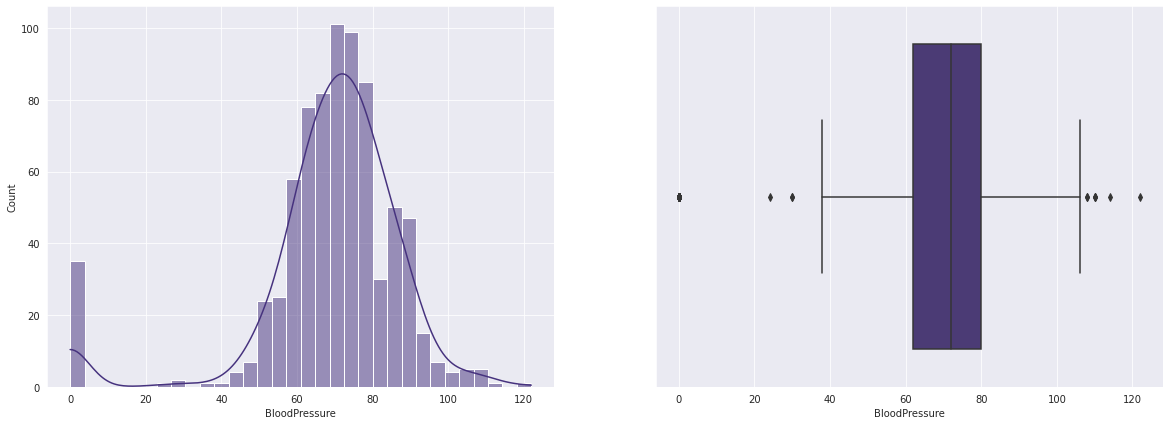

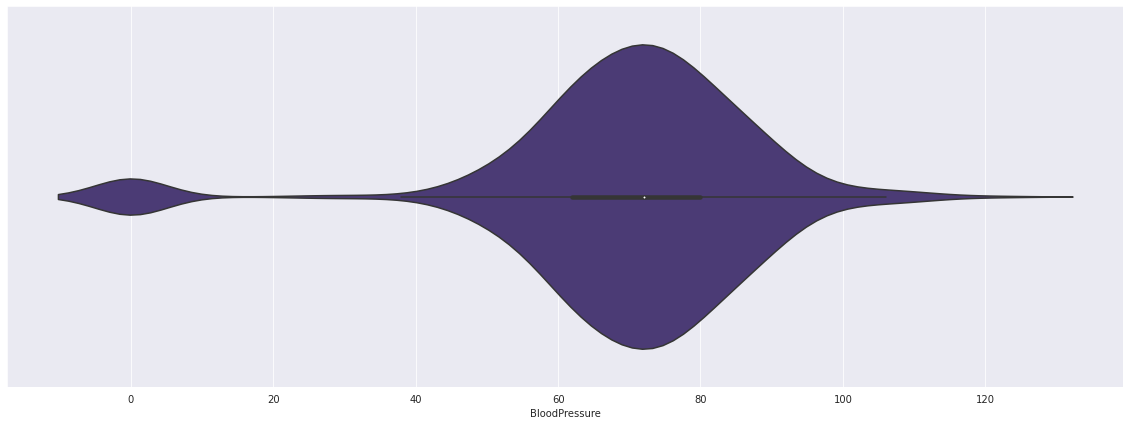

In [109]:
fig5, ax5 = plt.subplots(1, 2, figsize=(20, 7))
fig6, ax6 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="BloodPressure", kde=True, ax=ax5[0])
sns.boxplot(data=df, x="BloodPressure", ax=ax5[1])

sns.violinplot(data=df, x="BloodPressure", ax=ax6)

plt.show()

In [110]:
print("Median of Blood Pressure: ", df["BloodPressure"].median())
print("Maximum of Blood Pressure: ", df["BloodPressure"].max())
print("Mean of Pressure: ", df["BloodPressure"].mean())

Median of Blood Pressure:  72.0
Maximum of Blood Pressure:  122
Mean of Pressure:  69.10546875


In [111]:
print("Rows with BloodPressure value of 0: ", df[df["BloodPressure"] == 0].shape[0])

Rows with BloodPressure value of 0:  35


We observe that:
​
- Median (72.0) and mean (69.1) of `BloodPressure` lie very close to each other i.e. the distribution is more or less **symmetric and uniform**.
- As seen from the box plot and violin plot, some outliers lie on 0-value, which I talked about earlier.
- There are **35 rows** with `BloodPressure` value as 0. This is not logical.

### Analysis of Insulin

Plotting Histogram, Box plot and Violin plot for `Insulin`.

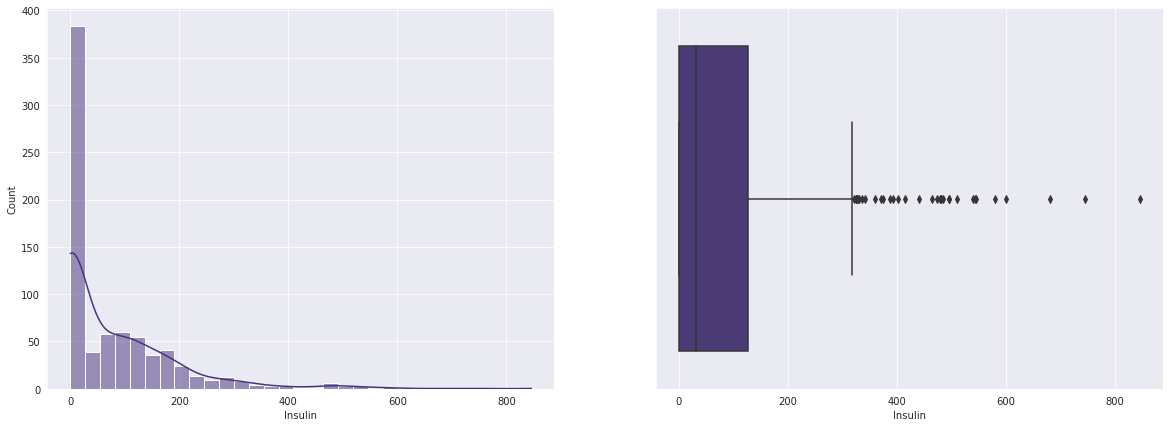

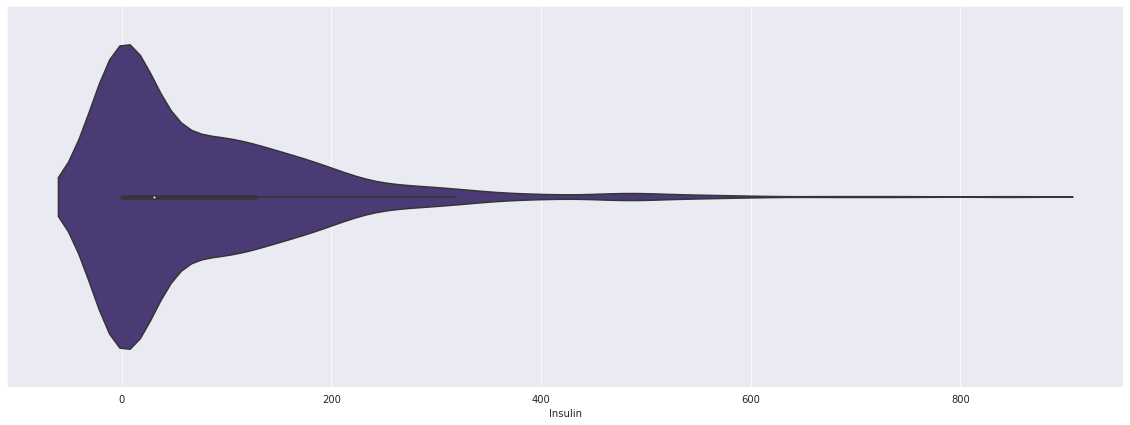

In [112]:
fig7, ax7 = plt.subplots(1, 2, figsize=(20, 7))
fig8, ax8 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="Insulin", kde=True, ax=ax7[0])
sns.boxplot(data=df, x="Insulin", ax=ax7[1])

sns.violinplot(data=df, x="Insulin", ax=ax8)

plt.show()

In [113]:
print("Rows with Insulin value of 0: ", df[df["Insulin"] == 0].shape[0])

Rows with Insulin value of 0:  374


The plots for `Insulin` are highly skewed. Also, the 0-value logical error is the most for this feature. **374 out of 768** instances have value of `Insulin` as 0.

### Analysis of BMI

Plotting Histogram, Box plot and Violin plot for `BMI`.

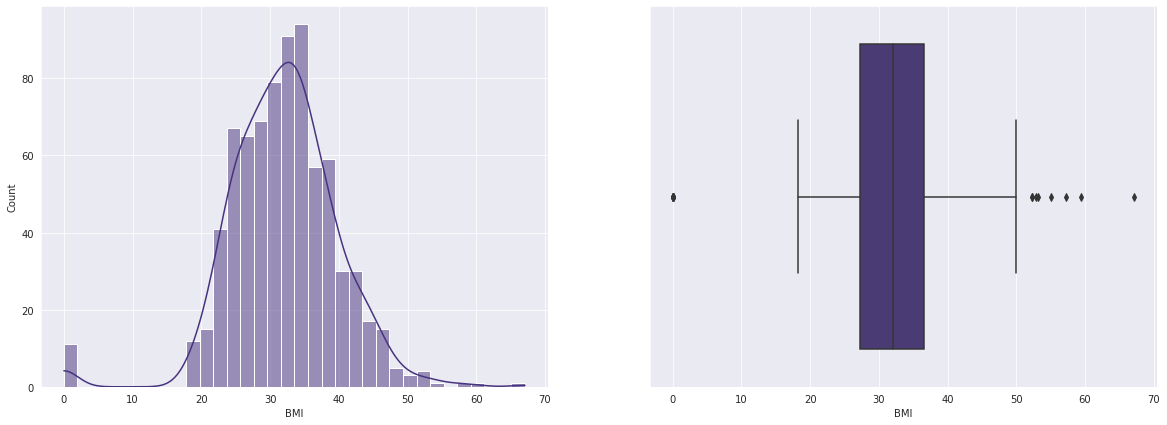

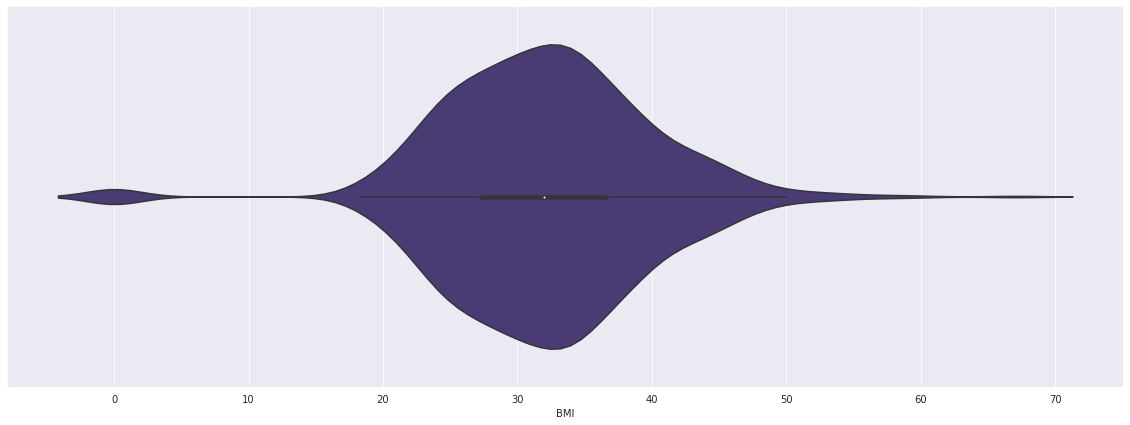

In [114]:
fig9, ax9 = plt.subplots(1, 2, figsize=(20, 7))
fig10, ax10 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="BMI", kde=True, ax=ax9[0])
sns.boxplot(data=df, x="BMI", ax=ax9[1])

sns.violinplot(data=df, x="BMI", ax=ax10)

plt.show()

In [115]:
print("Median of BMI: ", df["BMI"].median())
print("Maximum of BMI: ", df["BMI"].max())
print("Mean of BMI: ", df["BMI"].mean())

Median of BMI:  32.0
Maximum of BMI:  67.1
Mean of BMI:  31.992578124999998


In [116]:
print("Rows with BMI value of 0: ", df[df["BMI"] == 0].shape[0])

Rows with BMI value of 0:  11


We observe that:

- Median (32.0) and Mean (31.9) of `BMI` are very close to each other. Thus, the distribution is more or less **symmetric and uniform**
- Maximum BMI is 67.1
- There are **11 rows** with `BMI` value as 0

### Analysis of Diabetes Pedigree Function

`DiabetesPedigreeFunction` is a **continuous and quantitative** variable.

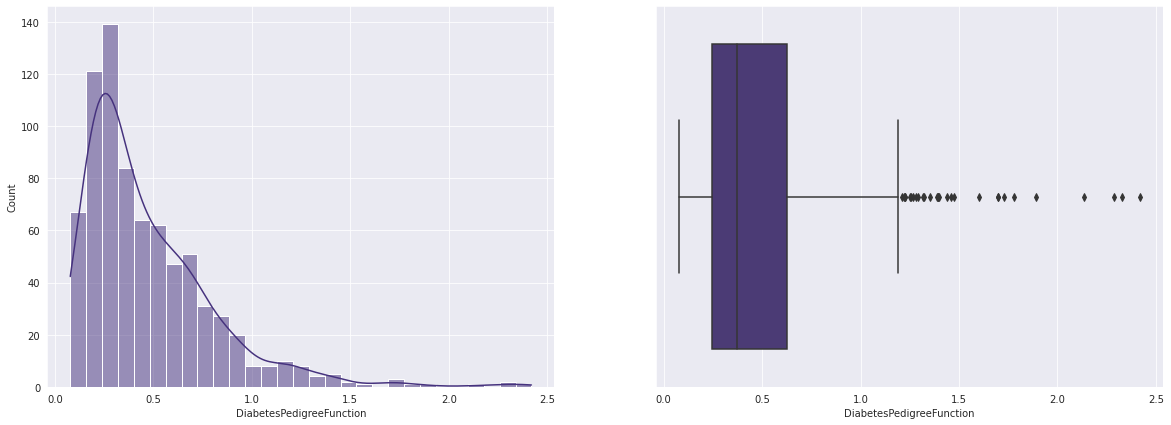

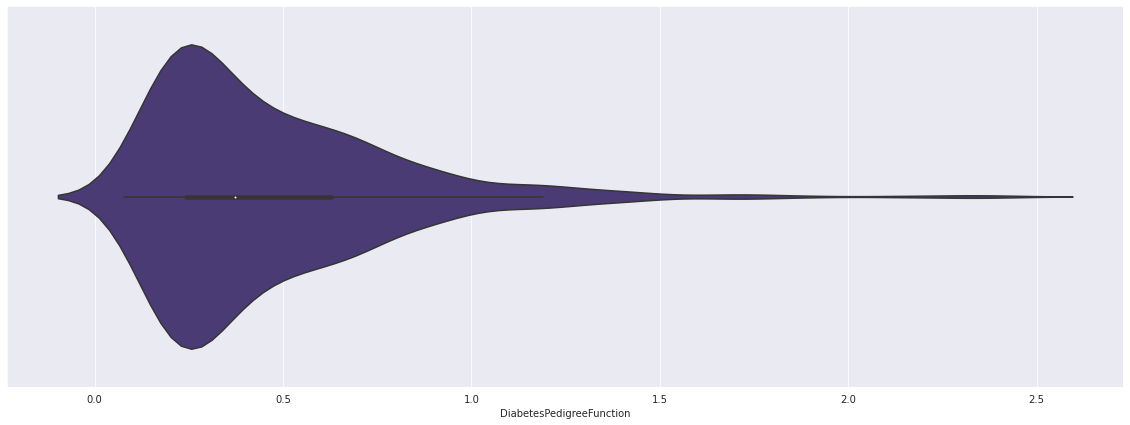

In [117]:
fig11, ax11 = plt.subplots(1, 2, figsize=(20, 7))
fig12, ax12 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True, ax=ax11[0])
sns.boxplot(data=df, x="DiabetesPedigreeFunction", ax=ax11[1])

sns.violinplot(data=df, x="DiabetesPedigreeFunction", ax=ax12)

plt.show()

In [118]:
print("Median of DiabetesPedigreeFunction: ", df["DiabetesPedigreeFunction"].median())
print("Maximum of DiabetesPedigreeFunction: ", df["DiabetesPedigreeFunction"].max())
print("Mean of DiabetesPedigreeFunction: ", df["DiabetesPedigreeFunction"].mean())

Median of DiabetesPedigreeFunction:  0.3725
Maximum of DiabetesPedigreeFunction:  2.42
Mean of DiabetesPedigreeFunction:  0.47187630208333325


We observe that:

- The histogram is higly skewed on the left side.
- There are many outliers in the Box plot.
- Violin plot distribution is dense in the interval `0.0 - 1.0`

### Analysis of Age

Plotting Histogram, Box plot and Violin plots for `Age`.

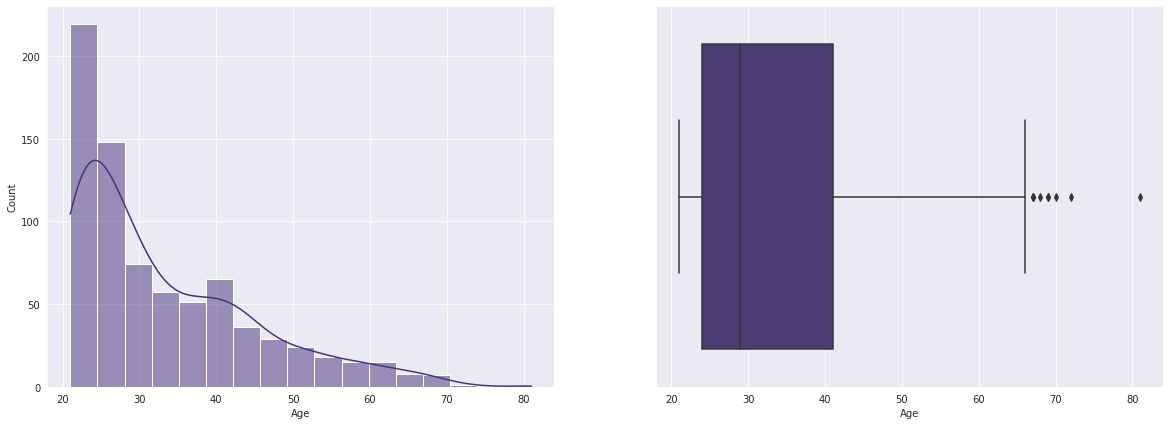

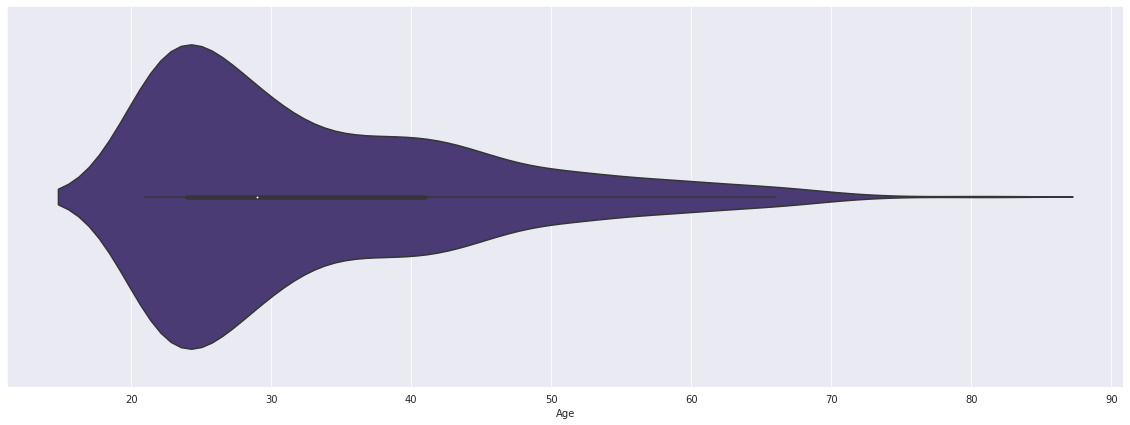

In [119]:
fig13, ax13 = plt.subplots(1, 2, figsize=(20, 7))
fig14, ax14 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="Age", kde=True, ax=ax13[0])
sns.boxplot(data=df, x="Age", ax=ax13[1])

sns.violinplot(data=df, x="Age", ax=ax14)

plt.show()

In [120]:
print("Median of Age: ", df["Age"].median())
print("Maximum of Age: ", df["Age"].max())
print("Mean of Age: ", df["Age"].mean())

Median of Age:  29.0
Maximum of Age:  81
Mean of Age:  33.240885416666664


We again observe that:

- The distribution of Age is skewed on the left side.
- There are some outliers in the Box plot for Age.

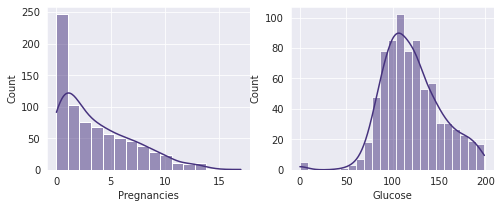

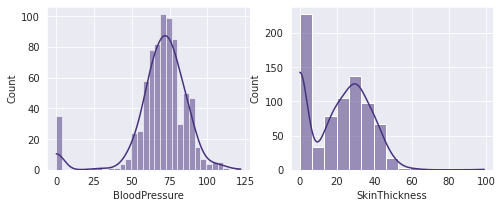

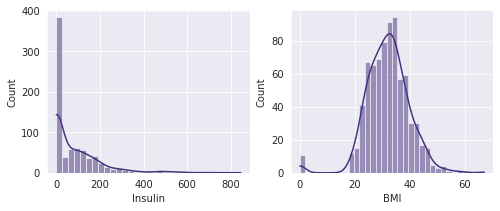

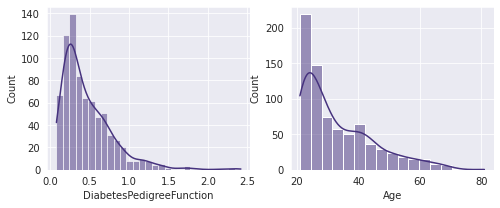

In [121]:
fig1, ax1 = plt.subplots(1, 2, figsize=(8, 3))
fig2, ax2 = plt.subplots(1, 2, figsize=(8, 3))
fig3, ax3 = plt.subplots(1, 2, figsize=(8, 3))
fig4, ax4 = plt.subplots(1, 2, figsize=(8, 3))

sns.histplot(data=df, x="Pregnancies", kde=True, ax=ax1[0])
sns.histplot(data=df, x="Glucose", kde=True, ax=ax1[1])
sns.histplot(data=df, x="BloodPressure", kde=True, ax=ax2[0])
sns.histplot(data=df, x="SkinThickness", kde=True, ax=ax2[1])
sns.histplot(data=df, x="Insulin", kde=True, ax=ax3[0])
sns.histplot(data=df, x="BMI", kde=True, ax=ax3[1])
sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True, ax=ax4[0])
sns.histplot(data=df, x="Age", kde=True, ax=ax4[1])
plt.savefig('healthy and diabetic classes1.png')
plt.show()

<h1 style="color: darkblue">Multivariate Analysis</h1>
<hr/>



### Analysis of Glucose and Outcome

Since `Glucose` is a continuous feature, we plot a histogram with its hue based on `Outcome`.

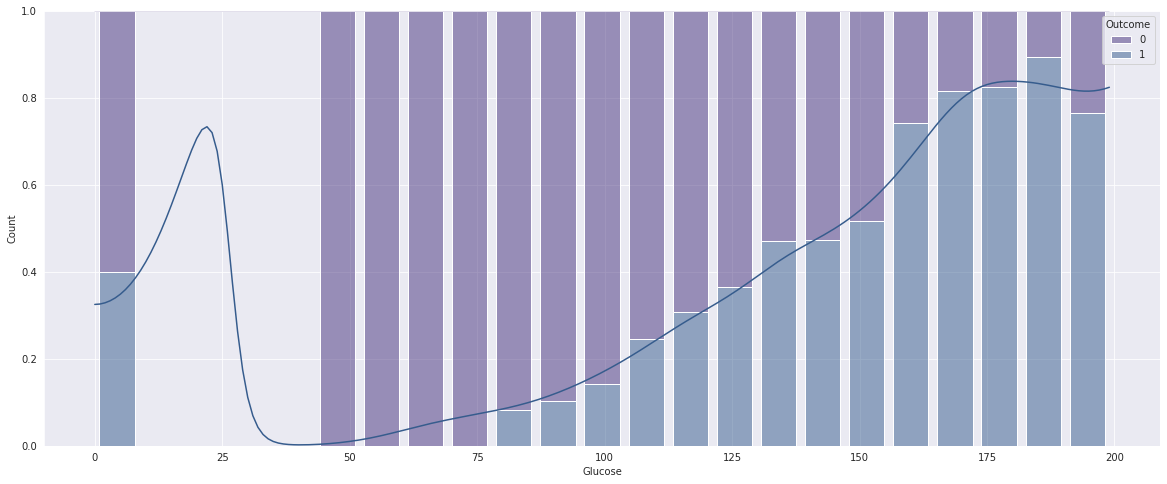

In [122]:
fig15, ax15 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="Glucose", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax15)
plt.show()

From the above plot, we see a **positive linear correlation**.

- As the value of `Glucose` increases, the count of patients having diabetes increases i.e. value of `Outcome` as 1, increases.
- Also, after the `Glucose` value of **125**, there is a steady increase in the number of patients having `Outcome` of 1.
- Note, when `Glucose` value is 0, it means the measurement is missing. We need to fill that values with the *mean* or *median* and then it will make sense.

So, there is a significant amount of *positive* linear correlation.

### Analysis of BloodPressure and Outcome

`BloodPressure` is continuous and `Outcome` is binary feature. So, plotting a histogram for `BloodPressure` with its hue based on `Outcome`.

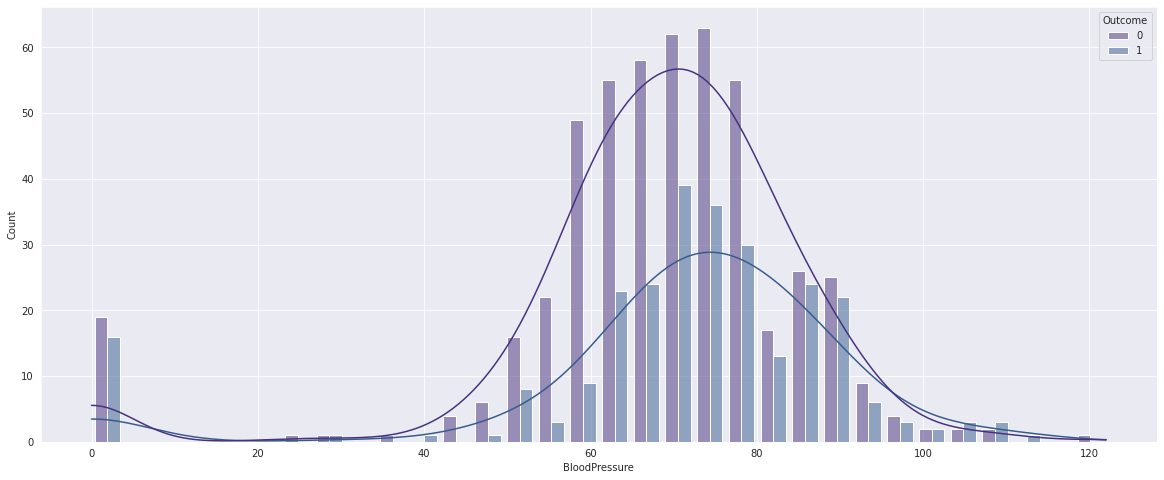

In [123]:
fig16, ax16 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="BloodPressure", hue="Outcome", shrink=0.8, multiple="dodge", kde=True, ax=ax16)
plt.show()

We observe that, `Outcome` and `BloodPressure` do **NOT** have a positive or negative linear correlation. The value of `Outcome` do not increase linearly as value of `BloodPressure` increases.

However, for `BloodPressure` values greater than 82, count of patients with `Outcome` as 1, is more.

### Analysis of BMI and Outcome

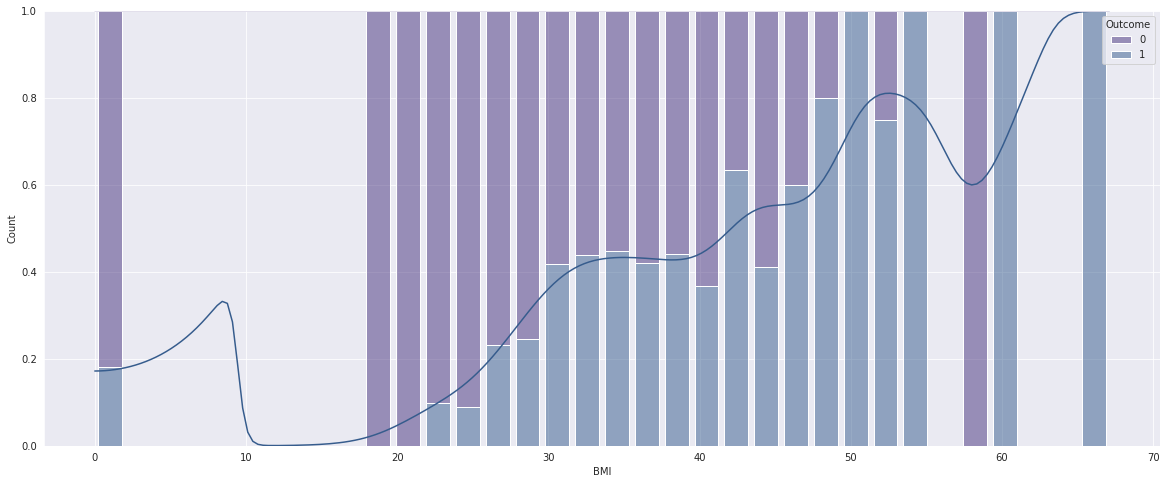

In [124]:
fig17, ax17 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="BMI", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax17)
plt.show()

From the above plot, a **positive linear correlation** is evident for `BMI`.

### Analysis of Age and Outcome

`Age` is continuous so plotting a histogram with hue based on `Outcome`.

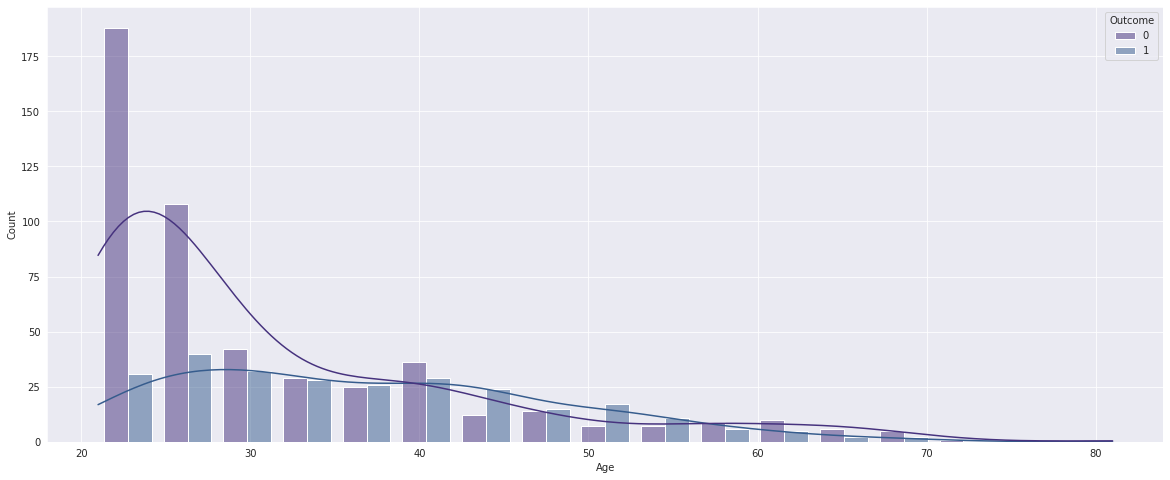

In [125]:
fig18, ax18 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="Age", hue="Outcome", shrink=0.8, multiple="dodge", kde=True, ax=ax18)
plt.show()

For `Age` greater than 35 years, the chances of patients having diabetes increases as evident from the plot i.e. The number of patients having diabetes is more than the number of people **NOT** having diabetes. But, it does not hold true for ages like **60+**, somehow.

There is *some* positive linear correlation though.

### Analysis of Pregnancies and Outcome

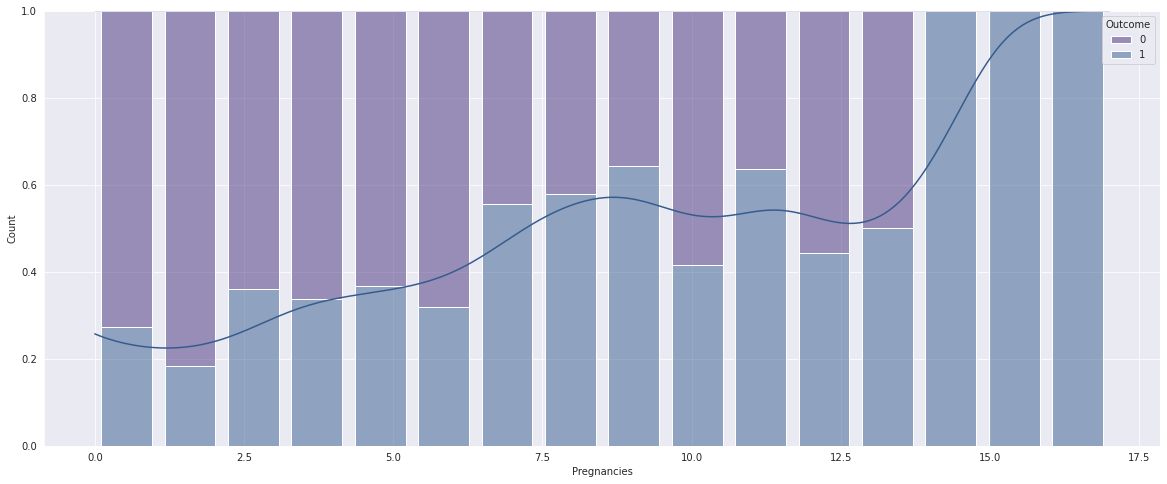

In [126]:
fig19, ax19 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="Pregnancies", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax19)
plt.show()

There is *some* positive linear correlation of `Pregnancies` with `Outcome`.

<h1 style="color: darkblue">Analyzing Correlations</h1>
<hr/>

Let us plot a **heatmap** of the correlation matrix of different features.

In [127]:
# The 2D correlation matrix
corr_matrix = df.corr()

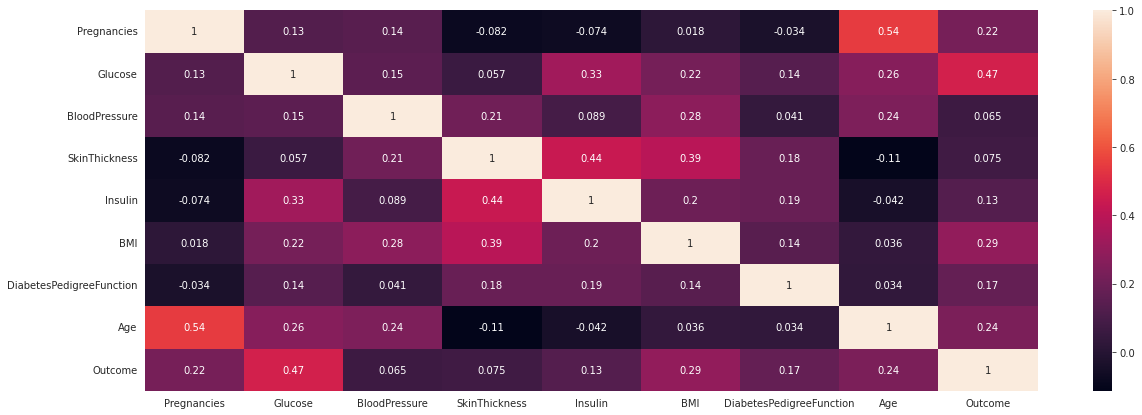

In [128]:
# Plotting the heatmap of corr

fig20, ax20 = plt.subplots(figsize=(20, 7))
dataplot = sns.heatmap(data=corr_matrix, annot=True, ax=ax20)
plt.show()

In [129]:
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

We observe that:

- `Glucose` has the maximum positive linear correlation with `Outcome`, which is logical.
- `BloodPressure` has the lowest positive linear correlation with `Outcome`.
- No feature has a negative linear correlation with `Outcome`.

<div style="border-radius: 10px; background-color: #A478B8">
    <h1 style="color: white; padding: 1rem">Preparing the Data</h1>
</div>

It is now time to prepare the data for machine learning algorithms to train on. There are a few things we need to do.

- **Split into training and testing set**: Using **Stratified Split**, we split the whole dataset into training and testing set such that the testing set is representative of the entire dataset.
- **Fill in the missing values**: Some features have 0-values which is not logical. So we need to replace them with either *mean* or *median*.
- **Scaling the feature values**: We apply standard scaling on the feature values, so that the ranges of the features are not too varied.

# Split into Training and Testing set

Since `Glucose` has the highest positive linear correlation with `Outcome`, we will split the dataset based on the categories of `Glucose`. This is called **Stratified Splitting** with the *strata* being `Glucose` categories. The categories do not exist just yet. We need to create them.

Below code cell creates a new feature called `Glucose_cat` which divides the `Glucose` feature having range $ [0 - 199] $ into **5 categories**.
The categories being:

- $(-1, 40]$
- $(40, 80]$
- $(80, 120]$
- $(120, 160]$
- $(160, \infty]$

In [130]:
newdf = df

In [131]:
# segment the dataset into bins

newdf["Glucose_cat"] = pd.cut(newdf["Glucose"],
                           bins=[-1, 40, 80, 120, 160, np.inf],
                          labels=[1, 2, 3, 4, 5])

In [132]:
newdf["Glucose_cat"].value_counts()

3    372
4    248
5    101
2     42
1      5
Name: Glucose_cat, dtype: int64

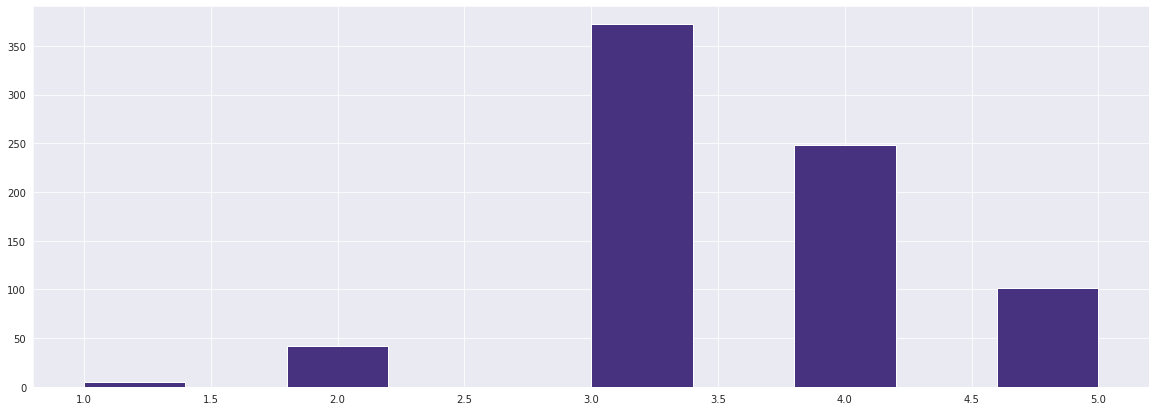

In [133]:
fig21, ax21 = plt.subplots(figsize=(20, 7))

newdf["Glucose_cat"].hist(ax=ax21)
plt.show()

Using **Scikit-Learn's `Stratified Shuffle Split`** we can split the dataset into Training and Testing set.

In [134]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=3301)

In [135]:
for train_index, test_index in split.split(newdf, newdf["Glucose_cat"]):
    strat_train_set = newdf.loc[train_index]
    strat_test_set = newdf.loc[test_index]

We can now compare the proportions of various `Glucose` categories between the Testing set and the entire dataset.
The output below shows the various proportions.

In [136]:
def get_glucose_proportions(ndf):
    print(ndf["Glucose_cat"].value_counts() / len(ndf))

print("Entire Dataset: ")
get_glucose_proportions(newdf)
print("\n")
print("-"*30)
print("\nTesting set: ")
get_glucose_proportions(strat_test_set)

Entire Dataset: 
3    0.484375
4    0.322917
5    0.131510
2    0.054688
1    0.006510
Name: Glucose_cat, dtype: float64


------------------------------

Testing set: 
3    0.487013
4    0.324675
5    0.129870
2    0.051948
1    0.006494
Name: Glucose_cat, dtype: float64


We now drop the `Glucose_cat` column to bring the data back to its original form.

In [137]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop(columns=["Glucose_cat"], inplace=True)

# Fill in the missing values

We will replace the 0-values of the columns:

- `Glucose`
- `BloodPressure`
- `SkinThickness`
- `Insulin`
- `BMI`

with their median values.

However, we will store the medians in an array, so that the test set can be replaced by that medians.

> Note: It is essential to split the dataset before performing **Imputation** (replacement of missing values) and **Standardization** to avoid data leaking of the test set into the training set. We want our model to perform good on unseen data.

In [138]:
# to store medians
meds = []
feats = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for feat in feats:
    meds.append(strat_train_set[feat].median())
    
print("Medians are: ", meds)

Medians are:  [117.0, 72.0, 23.0, 37.0, 32.0]


In [139]:
# helper function
def replace_with_median(ndf, feat, value):
    ndf[feat] = ndf[feat].replace(0, value)
    
for i, feat in enumerate(feats):
    replace_with_median(strat_train_set, feat, meds[i])
    replace_with_median(strat_test_set, feat, meds[i])

With this, we replaced all the missing values with the median (of that column) in the Training set and used those *learned* medians to replace the missing values in the Testing set.

In [140]:
X_train = strat_train_set.drop(columns="Outcome")
y_train = strat_train_set["Outcome"]

X_test = strat_test_set.drop(columns="Outcome")
y_test = strat_test_set["Outcome"]

# Scaling the features

Since the ranges of different features vary too much, it is necessary to *scale* them so that the Machine Learning models can perform even better. We will use **Scikit-Learn's Standard Scaler** to scale the features.

In [141]:
stdscaler = StandardScaler()
stdscaler.fit(X_train)

StandardScaler()

In [142]:
X_train_ = stdscaler.transform(X_train)
X_test_ = stdscaler.transform(X_test)

print("Scaled training set: ", X_train_)
print("Scaled testing set: ", X_test_)

Scaled training set:  [[-0.25226534 -0.28555376 -1.78963553 ... -0.40975107  0.42215624
  -0.69608053]
 [ 1.53150724 -0.05593541 -0.01991395 ... -1.69925751  0.73292795
   1.2104457 ]
 [ 1.82880267  0.86253797  0.94538873 ...  0.7908239   1.51130942
   1.45912303]
 ...
 [-0.8468562  -1.07281666 -3.88112468 ... -0.66172359  0.22756088
  -1.02765031]
 [-0.54956077 -1.04001404 -0.34168151 ...  0.87975538  0.064914
  -0.53029564]
 [ 0.34232552 -0.15434328  1.10627251 ...  1.0131526  -0.66699693
   0.71309103]]
Scaled testing set:  [[-1.14415163  0.14088031  1.10627251 ... -0.72101124  0.0997669
  -1.02765031]
 [ 0.63962095  0.40330128 -0.18079773 ...  0.46474181  0.17818593
  -0.36451075]
 [-0.25226534 -0.351159   -0.82433285 ... -1.43246308 -0.98357745
  -1.02765031]
 ...
 [ 0.63962095 -0.58077735  0.14096983 ... -0.35046341  0.70097946
   0.63019859]
 [ 1.23421181 -0.05593541  1.10627251 ... -0.57279211 -0.64376166
  -0.94475786]
 [ 0.04503009 -0.9744088   0.62362117 ...  1.47263191 -0.7

Done! We now have our Training set `X_train_` (numpy array), Testing set `X_test_` (numpy array) and labels `y_train` and `y_test`, for **supervised learning**.

<div style="border-radius: 10px; background-color: #A478B8">
    <h1 style="color: white; padding: 1rem">Classification - Supervised Learning</h1>
</div>

Data preparation is done, now its time to run ML algorithms on the preprocessed data. Here, I have written a custom helper function to compare a list of Classifiers, using their **Classification Report**, **Confusion Matrix**, **Precision Recall Curve** and **Reciever Operating Characteristic Curve**.

In [143]:
def comp_esti(esti):
    esti.fit(X_train_, y_train)
    esti_test_preds = esti.predict(X_test_)
    
    print(f"{esti} Accuracy score: ", accuracy_score(y_test, esti_test_preds))
    print(f"\n{esti} Classification report:\n", classification_report(y_test, esti_test_preds, digits=6))
    
    # confusion matrix
    cf_mat = confusion_matrix(y_test, esti_test_preds)
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(data=cf_mat, annot=True, ax=ax)
    plt.show()

Next, we provide a list of classifiers as a parameter to this function...

RandomForestClassifier(random_state=3301) Accuracy score:  0.7012987012987013

RandomForestClassifier(random_state=3301) Classification report:
               precision    recall  f1-score   support

           0   0.745098  0.791667  0.767677        96
           1   0.615385  0.551724  0.581818        58

    accuracy                       0.701299       154
   macro avg   0.680241  0.671695  0.674747       154
weighted avg   0.696245  0.701299  0.697678       154



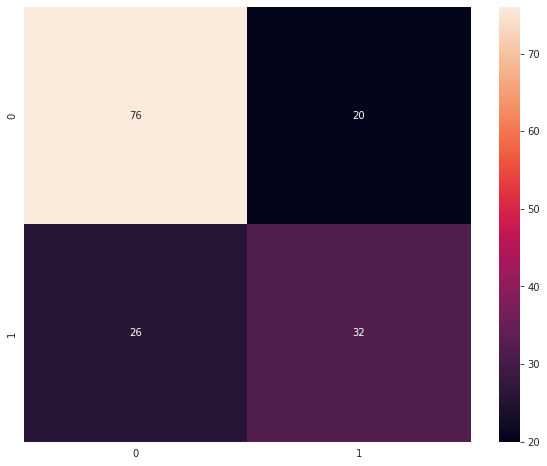

SVC() Accuracy score:  0.7207792207792207

SVC() Classification report:
               precision    recall  f1-score   support

           0   0.738739  0.854167  0.792271        96
           1   0.674419  0.500000  0.574257        58

    accuracy                       0.720779       154
   macro avg   0.706579  0.677083  0.683264       154
weighted avg   0.714514  0.720779  0.710162       154



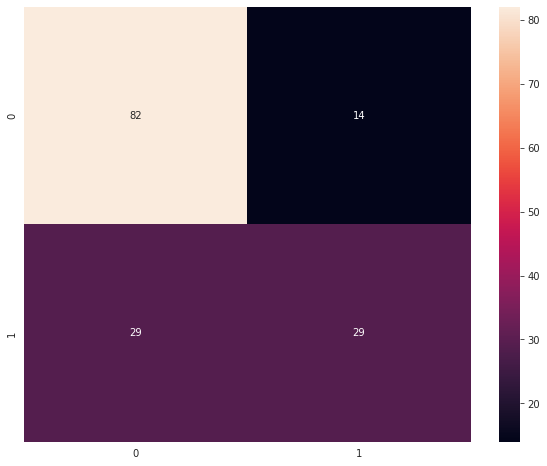

AdaBoostClassifier() Accuracy score:  0.6948051948051948

AdaBoostClassifier() Classification report:
               precision    recall  f1-score   support

           0   0.752577  0.760417  0.756477        96
           1   0.596491  0.586207  0.591304        58

    accuracy                       0.694805       154
   macro avg   0.674534  0.673312  0.673891       154
weighted avg   0.693792  0.694805  0.694269       154



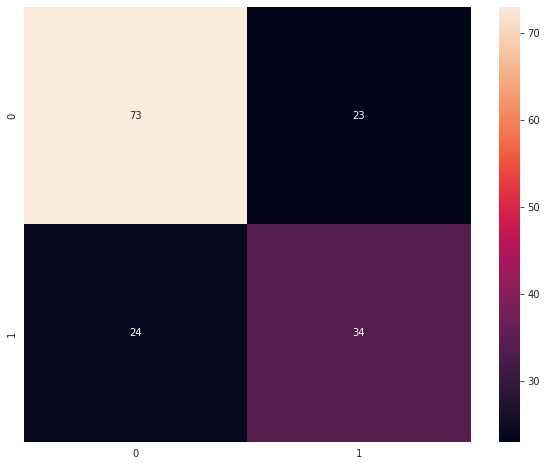

GradientBoostingClassifier() Accuracy score:  0.7012987012987013

GradientBoostingClassifier() Classification report:
               precision    recall  f1-score   support

           0   0.755102  0.770833  0.762887        96
           1   0.607143  0.586207  0.596491        58

    accuracy                       0.701299       154
   macro avg   0.681122  0.678520  0.679689       154
weighted avg   0.699377  0.701299  0.700218       154



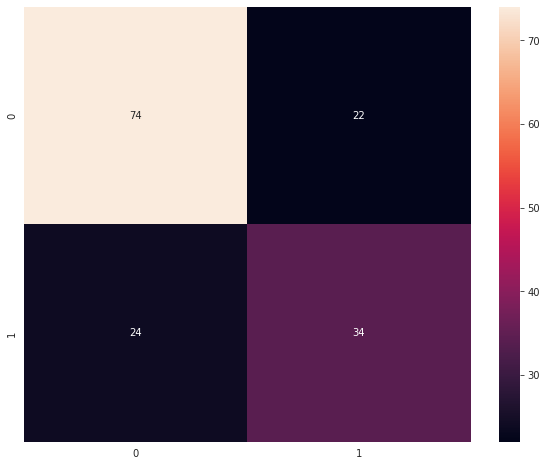

LogisticRegression() Accuracy score:  0.7337662337662337

LogisticRegression() Classification report:
               precision    recall  f1-score   support

           0   0.743363  0.875000  0.803828        96
           1   0.707317  0.500000  0.585859        58

    accuracy                       0.733766       154
   macro avg   0.725340  0.687500  0.694843       154
weighted avg   0.729787  0.733766  0.721735       154



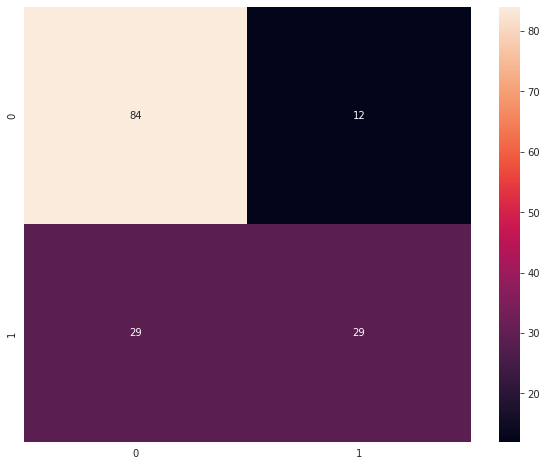

DecisionTreeClassifier() Accuracy score:  0.6623376623376623

DecisionTreeClassifier() Classification report:
               precision    recall  f1-score   support

           0   0.734043  0.718750  0.726316        96
           1   0.550000  0.568966  0.559322        58

    accuracy                       0.662338       154
   macro avg   0.642021  0.643858  0.642819       154
weighted avg   0.664728  0.662338  0.663422       154



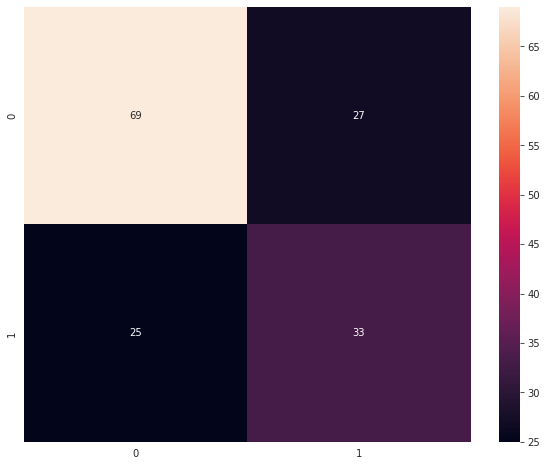

KNeighborsClassifier() Accuracy score:  0.7337662337662337

KNeighborsClassifier() Classification report:
               precision    recall  f1-score   support

           0   0.747748  0.864583  0.801932        96
           1   0.697674  0.517241  0.594059        58

    accuracy                       0.733766       154
   macro avg   0.722711  0.690912  0.697996       154
weighted avg   0.728889  0.733766  0.723643       154



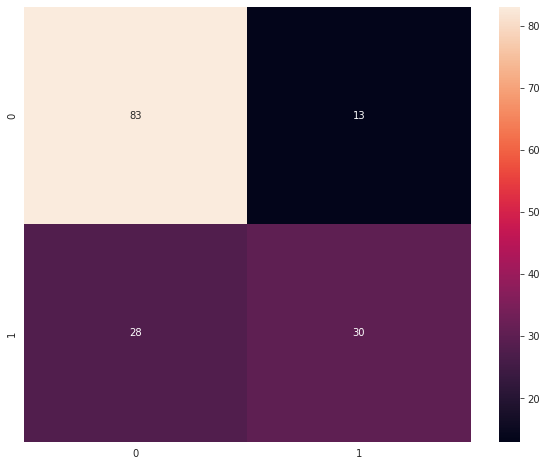

In [144]:
estimators = [
    RandomForestClassifier(random_state=3301),
    SVC(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

for esti in estimators:
    comp_esti(esti)

VotingClassifier(estimators=[('rfc', RandomForestClassifier(random_state=3301)),
                             ('svc', SVC(probability=True)),
                             ('grb', GradientBoostingClassifier())],
                 voting='soft') Accuracy score:  0.7012987012987013

VotingClassifier(estimators=[('rfc', RandomForestClassifier(random_state=3301)),
                             ('svc', SVC(probability=True)),
                             ('grb', GradientBoostingClassifier())],
                 voting='soft') Classification report:
               precision    recall  f1-score   support

           0   0.740385  0.802083  0.770000        96
           1   0.620000  0.534483  0.574074        58

    accuracy                       0.701299       154
   macro avg   0.680192  0.668283  0.672037       154
weighted avg   0.695045  0.701299  0.696210       154



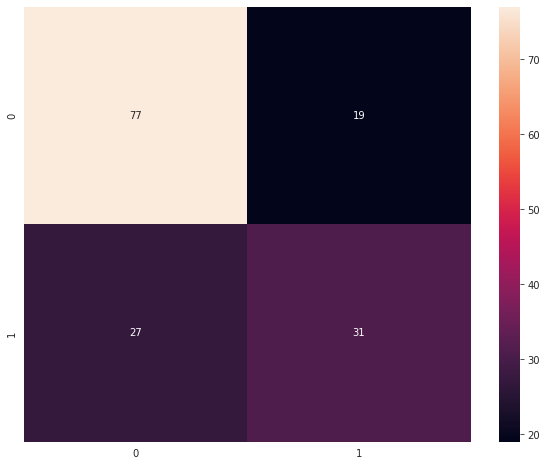

In [145]:
# Voting classifier
es1 = RandomForestClassifier(random_state=3301)
es2 = SVC(probability=True)
es3 = GradientBoostingClassifier()

esfinal = VotingClassifier(estimators=[
    ("rfc", es1), ("svc", es2), ("grb", es3)
], voting="soft")

comp_esti(esfinal)

> Note: Which model to choose? That highly depends on what your application is targeted to do. In essence, do you wanna go for high precision or high recall?

However, as an example let's fine-tune the **Random Forest Classifier**.

<div style="border-radius: 10px; background-color: #A478B8">
    <h1 style="color: white; padding: 1rem">Fine-tuning our Model</h1>
</div>

Using **Randomized Search CV**, let's try to find better hyperparameters for the **Random Forest Classifier**.

In [146]:
# Parameters of random forest classifier
n_estimators = np.linspace(50, 300, int((300 - 50) / 20), dtype=int)
max_depth = [1, 5, 10, 50, 100, 200, 300]
min_samples_split = [2, 4, 6]
max_features = ["sqrt", "log2"]
bootstrap = [True, False]

distributions = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "max_features": max_features,
    "bootstrap": bootstrap
}

In [147]:
# Randomised search cv
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier(random_state=3301)
random_search_cv = RandomizedSearchCV(
    rfc,
    param_distributions=distributions,
    n_iter=30,
    cv=5,
    n_jobs=4
)

search = random_search_cv.fit(X_train_, y_train)

The results of this Randomized Search are stored in a dictionary named `cv_results_`. Let us print these results just to get an idea of what parameters were tested by our Randomized Search.

In [148]:
cvres = search.cv_results_

for score, params, rank in zip(cvres["mean_test_score"], cvres["params"], cvres["rank_test_score"]):
    print(score, params, rank)
    

0.7035719045715048 {'n_estimators': 118, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 1, 'bootstrap': True} 30
0.7752499000399841 {'n_estimators': 72, 'min_samples_split': 6, 'max_features': 'sqrt', 'max_depth': 200, 'bootstrap': True} 8
0.7638278022124483 {'n_estimators': 209, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False} 16
0.7573104091696655 {'n_estimators': 209, 'min_samples_split': 6, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': False} 20
0.767093162734906 {'n_estimators': 277, 'min_samples_split': 6, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False} 14
0.7133146741303478 {'n_estimators': 186, 'min_samples_split': 6, 'max_features': 'sqrt', 'max_depth': 1, 'bootstrap': False} 29
0.7769025723044115 {'n_estimators': 72, 'min_samples_split': 6, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True} 5
0.7621751299480207 {'n_estimators': 118, 'min_samples_split': 6, 'max_features': 'sqrt', 'max_depth': 10, '

Also, the best estimator out of these tested ones is stored in a variable called `best_estimator_`. We can use this estimator as our fine-tuned model.

              precision    recall  f1-score   support

           0    0.76000   0.79167   0.77551        96
           1    0.62963   0.58621   0.60714        58

    accuracy                        0.71429       154
   macro avg    0.69481   0.68894   0.69133       154
weighted avg    0.71090   0.71429   0.71210       154



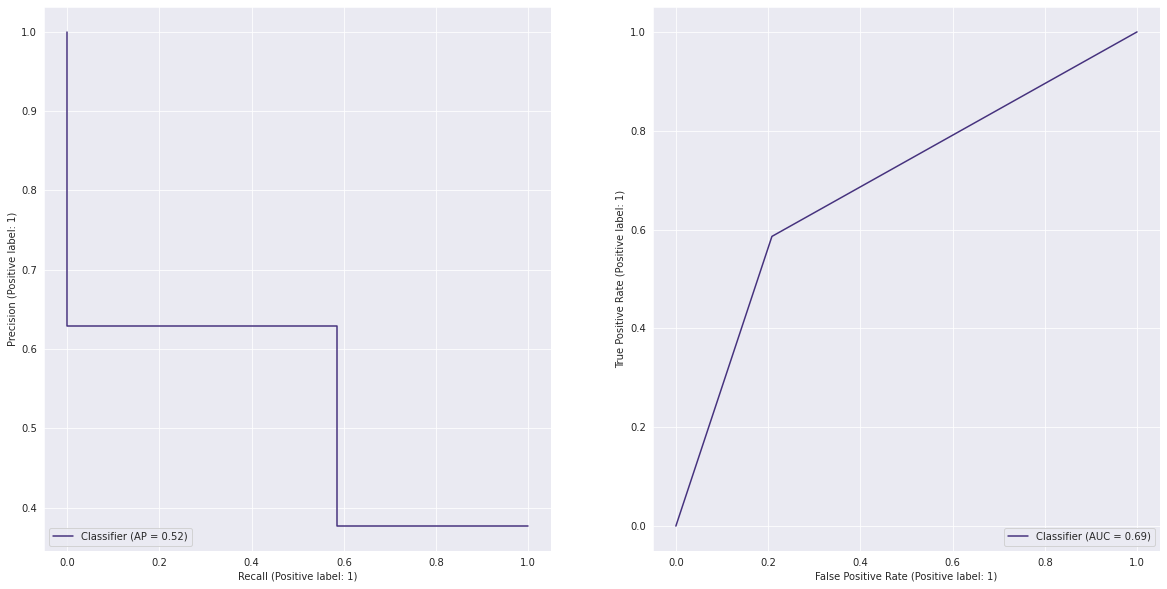

In [149]:
rfc_finetuned = search.best_estimator_
rfc_finetuned.fit(X_train_, y_train)

best_preds = rfc_finetuned.predict(X_test_)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
PrecisionRecallDisplay.from_predictions(y_test, best_preds, ax=ax[0])
RocCurveDisplay.from_predictions(y_test, best_preds, ax=ax[1])

print(classification_report(y_test, best_preds, digits=5))
plt.show()

As you can see, by fine-tuning the **Random Forest Classifier**:

- We increased the average precision from **0.68** to **0.70**.
- We increased the average recall from **0.67** to **0.69**.
- We increased the accuracy from **70%** to **72%**.

In [150]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_cat
0,6,148,72,35,0,33.6,0.627,50,1,4
1,1,85,66,29,0,26.6,0.351,31,0,3
2,8,183,64,0,0,23.3,0.672,32,1,5
3,1,89,66,23,94,28.1,0.167,21,0,3
4,0,137,40,35,168,43.1,2.288,33,1,4
